In [1]:
import pandas as pd 
import numpy as np

/tmp/ipykernel_348791/4018586642.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('../data/marketing_campaign.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Easy

In [5]:
sum(df['Complain']) # кол-во жалоб

21

In [24]:
df_customers = df[(df['MntFishProducts'] > 0) | (df['MntMeatProducts'] > 0) | (df['MntSweetProducts'] > 0) | (df['MntFruits'] > 0) | (df['MntWines'] > 0) | (df['MntGoldProds'] > 0)]
df_customers["Age"] = 2024 - df_customers["Year_Birth"]
df_customers["Age"].mean() # средний возраст покупателей

55.19419642857143

In [25]:
df["Age"] = 2024 - df["Year_Birth"]
df["Age"].mean() # средний возраст всех людей в датасете

55.19419642857143

Средний возраст покупателей и всех людей в датасете одинаковый

# Medium

Постройте графики и визуально оцените, есть ли зависимости между колонками:

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Recency
- NumWebPurchases
- NumStorePurchases
- Age

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

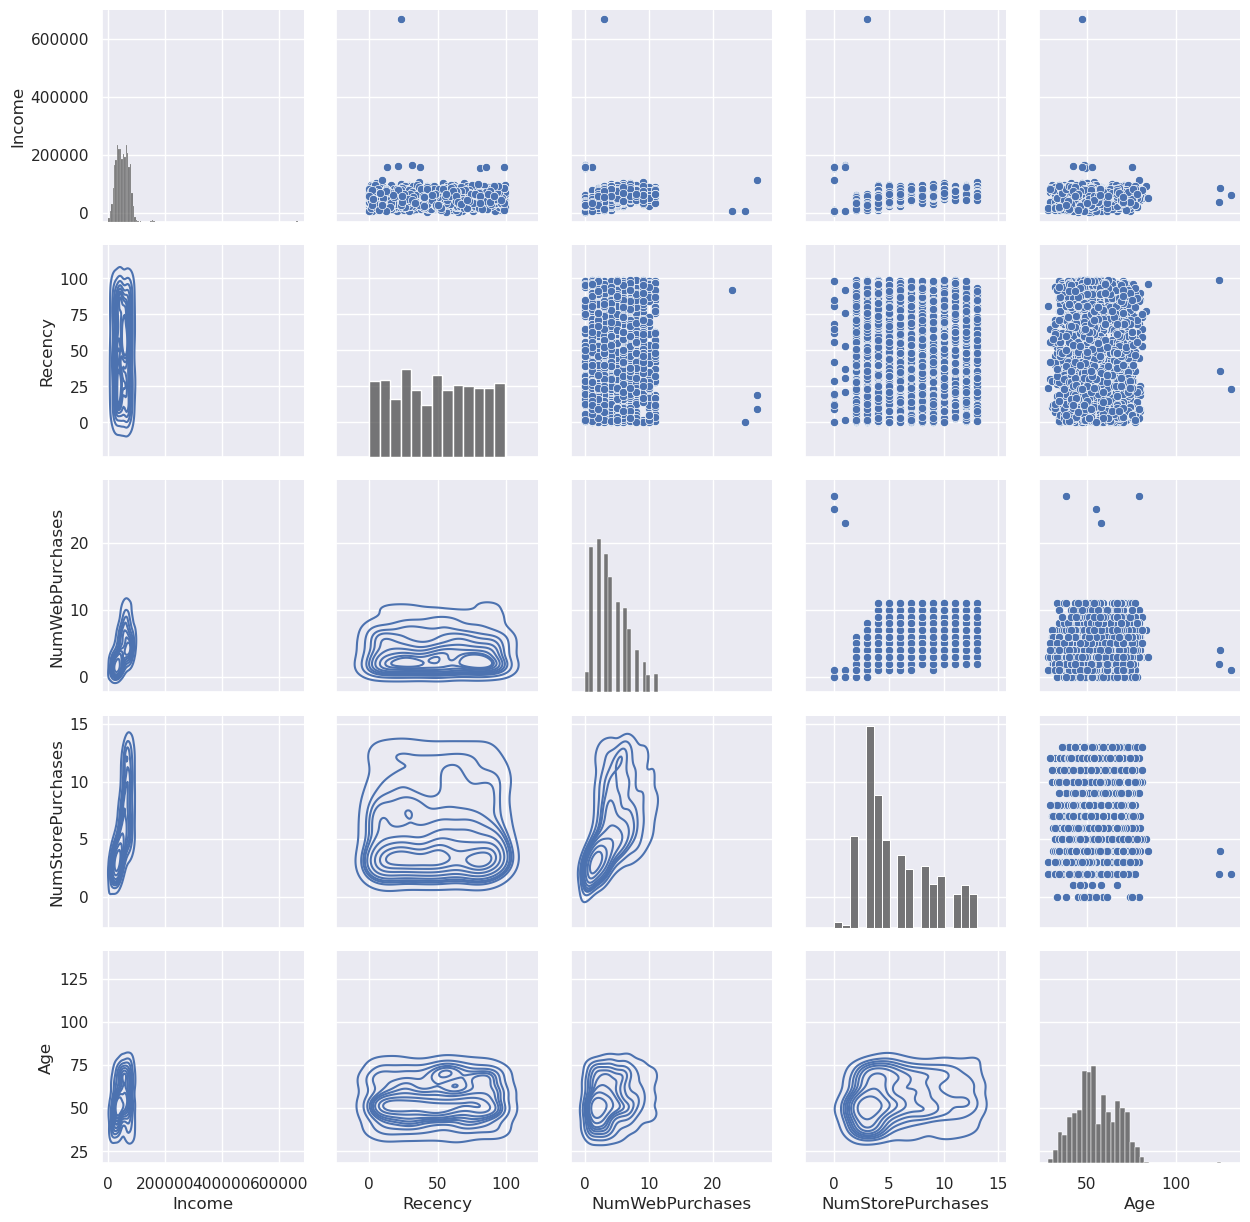

In [39]:
variables = ['Income', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'Age']
g = sns.PairGrid(df, vars=variables)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

<Axes: xlabel='Kidhome', ylabel='Density'>

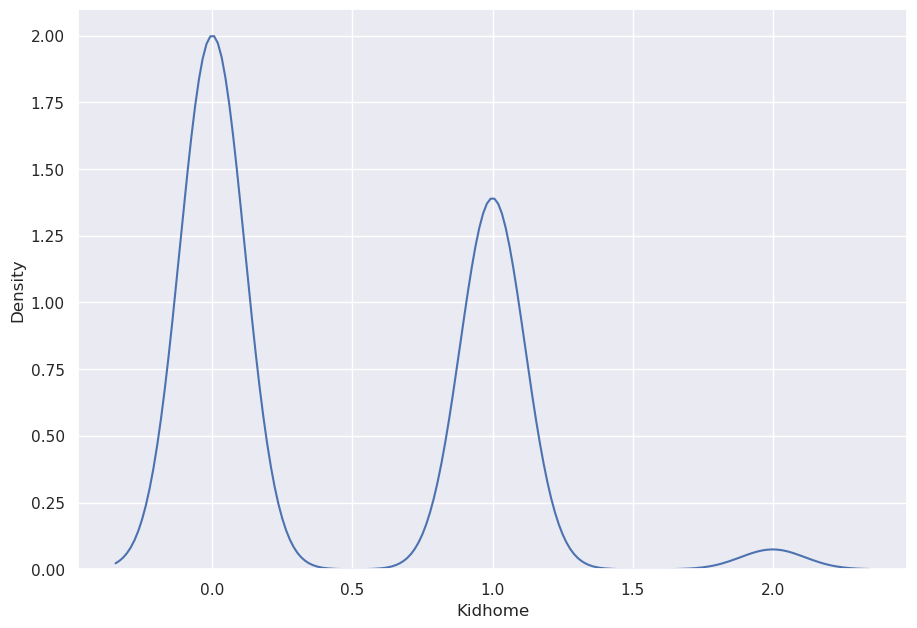

In [52]:
sns.kdeplot(data=df, x='Kidhome')

<Axes: xlabel='Teenhome', ylabel='Density'>

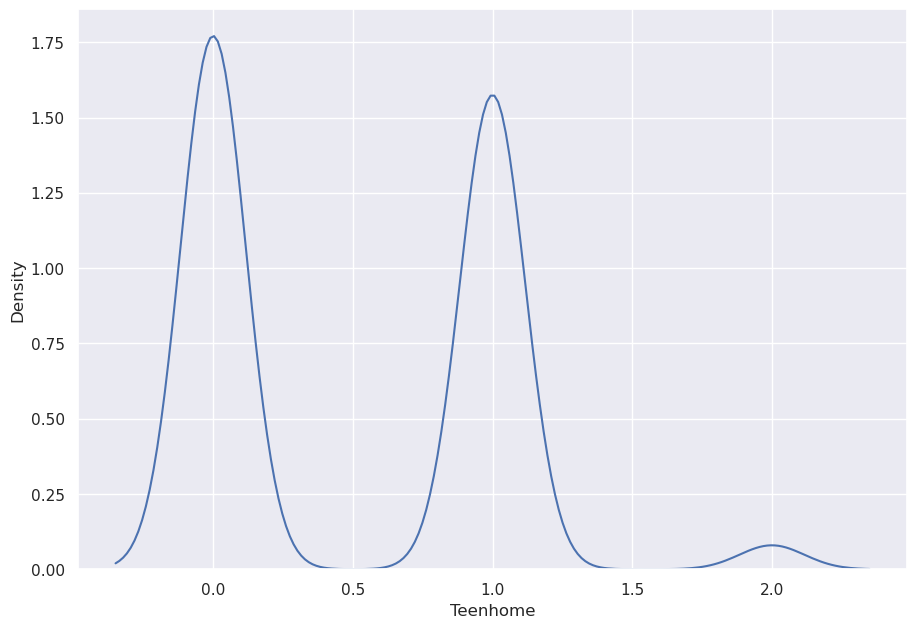

In [51]:
sns.kdeplot(data=df, x='Teenhome')

/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


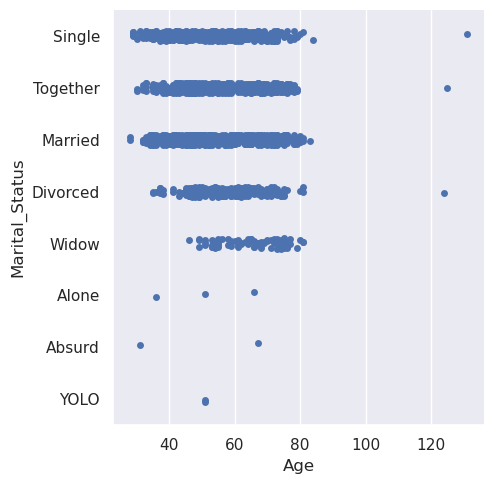

In [46]:
sns.catplot(data=df, x="Age", y="Marital_Status")

/home/nixiiee/miniconda3/envs/classical-ml/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


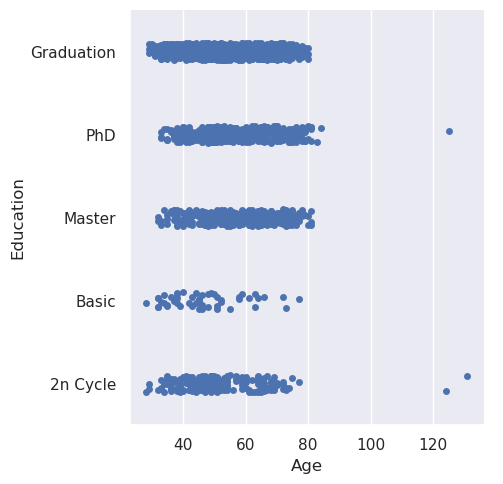

In [47]:
sns.catplot(data=df, x="Age", y="Education")